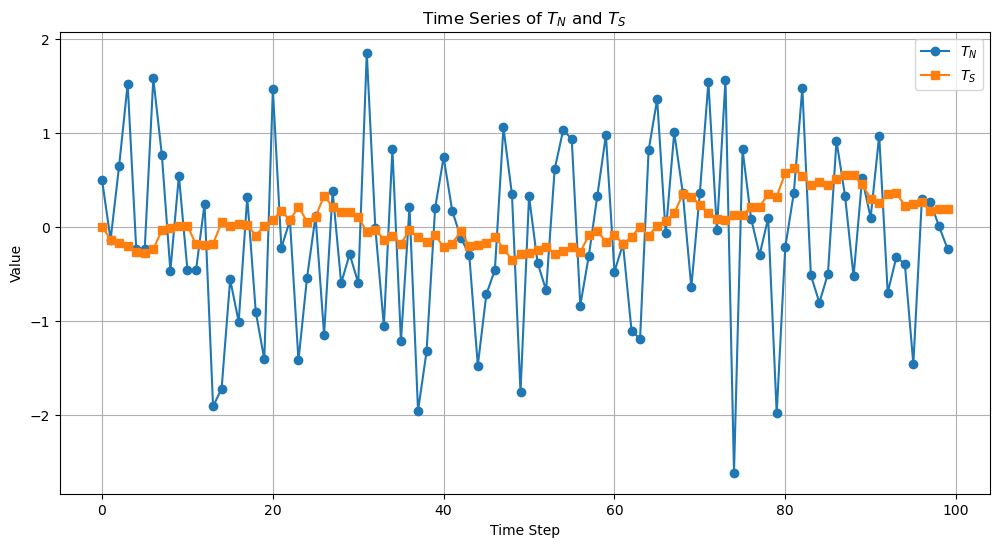

Maximum correlation occurs at lag 21 with a value of 0.202


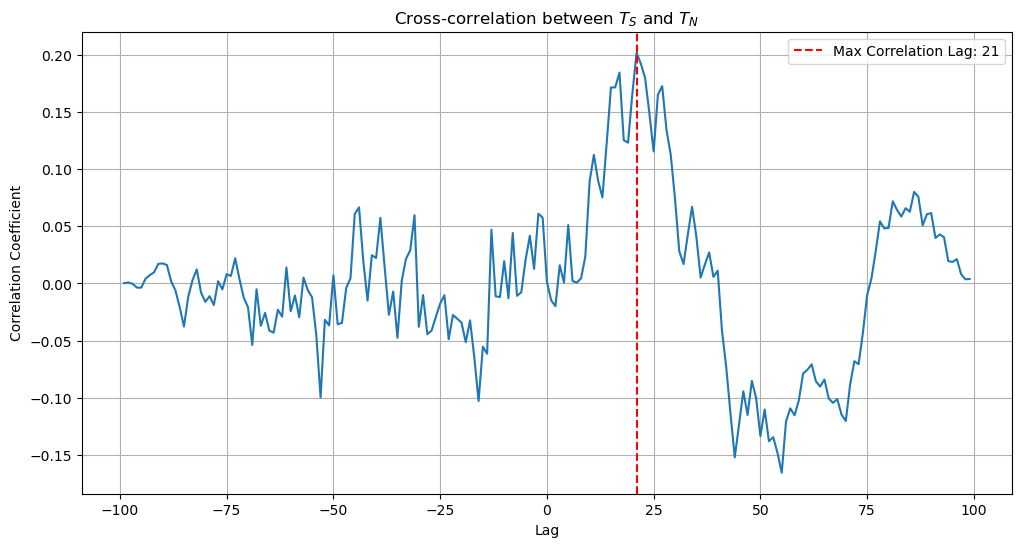

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import pearsonr
from scipy import signal

# Set a seed for reproducibility
np.random.seed(42)

# Generate TN as random normal variables
TN = np.random.normal(size=100)
# TN = -1*(signal.sawtooth(2 * np.pi * 5 * t))-3*(signal.square(2 * np.pi * 5 * t))

# Parameters for the model
tau = 100  # Characteristic timescale
TS_initial = 0  # Initial condition for TS

# Initialize TS
TS = np.zeros(len(TN))
TS[0] = TS_initial

# Generate TS using the provided model
for i in range(1, len(TN)):
    TS[i] = TS[i-1] + (1/tau) * (-TS[i-1] + TN[i-1]) + np.random.normal(0, 0.1)

# Task 1: Plot TN and TS
plt.figure(figsize=(12, 6))
plt.plot(TN, label='$T_N$', marker='o')
plt.plot(TS, label='$T_S$', marker='s')
plt.title('Time Series of $T_N$ and $T_S$')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Calculate the lagged correlation and find the lag between TN and TS
# Compute the cross-correlation
lags = np.arange(-len(TN)+1, len(TN))
corr = correlate(TS - np.mean(TS), TN - np.mean(TN), mode='full') / (np.std(TS) * np.std(TN) * len(TN))

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr)
optimal_lag = lags[max_corr_index]
max_corr_value = corr[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Task 3: Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()



Text(0.5, 1.0, 'Time Series of $\\Delta T_N$')

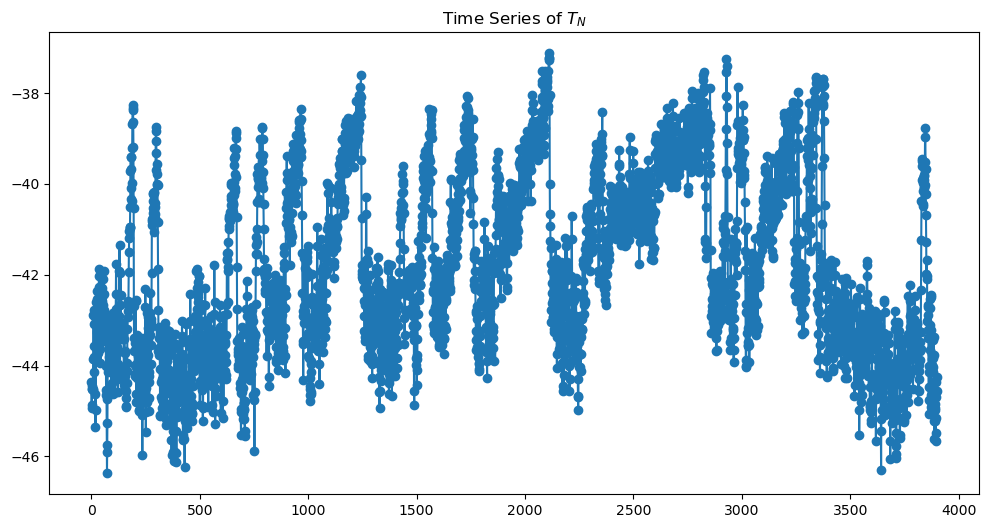

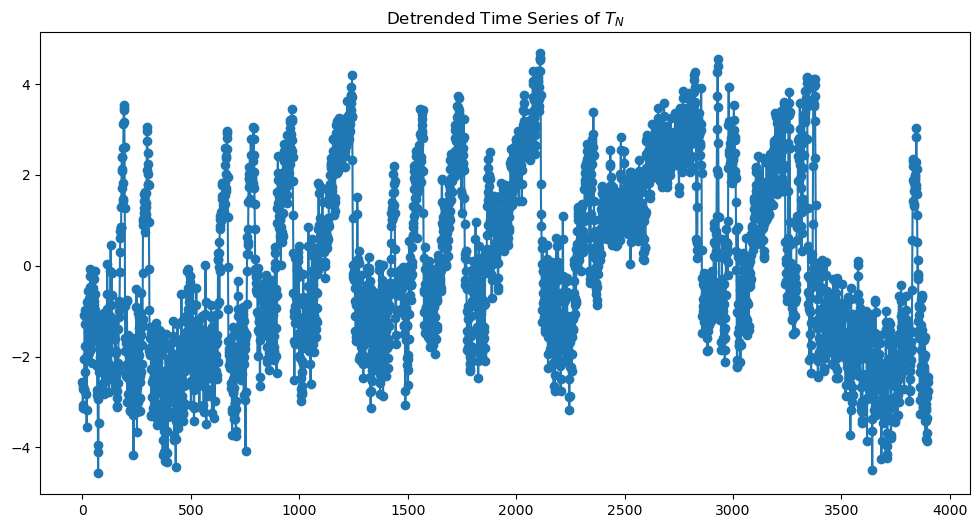

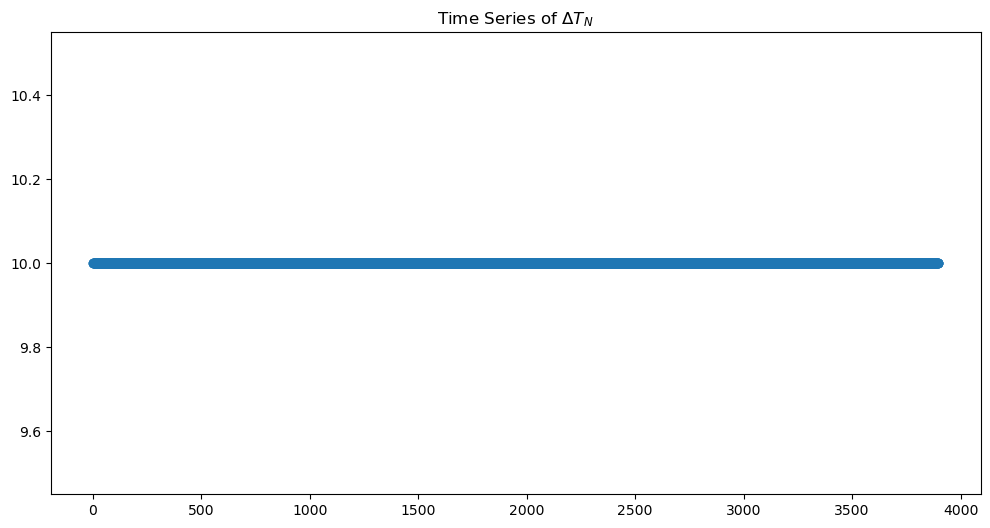

In [27]:
import pandas as pd

df_TN = pd.read_csv("realdata.csv")
# get the second column of TN
TN = df_TN.iloc[:, 1].values

# plot TN
plt.figure(figsize=(12, 6))
plt.plot(TN, label='$T_N$', marker='o')
plt.title('Time Series of $T_N$')

# detrend TN and plot it
TN_detrended = TN - np.mean(TN)
plt.figure(figsize=(12, 6))
plt.plot(TN_detrended, label='$T_N$ Detrended', marker='o')
plt.title('Detrended Time Series of $T_N$')


# calcualte the np.diff of TN and plot it
TN_time = df_TN.iloc[:, 0].values
TN_time_diff = np.diff(TN_time)
plt.figure(figsize=(12, 6))
plt.plot(TN_time_diff, label='$\Delta T_N$', marker='o')
plt.title('Time Series of $\Delta T_N$')

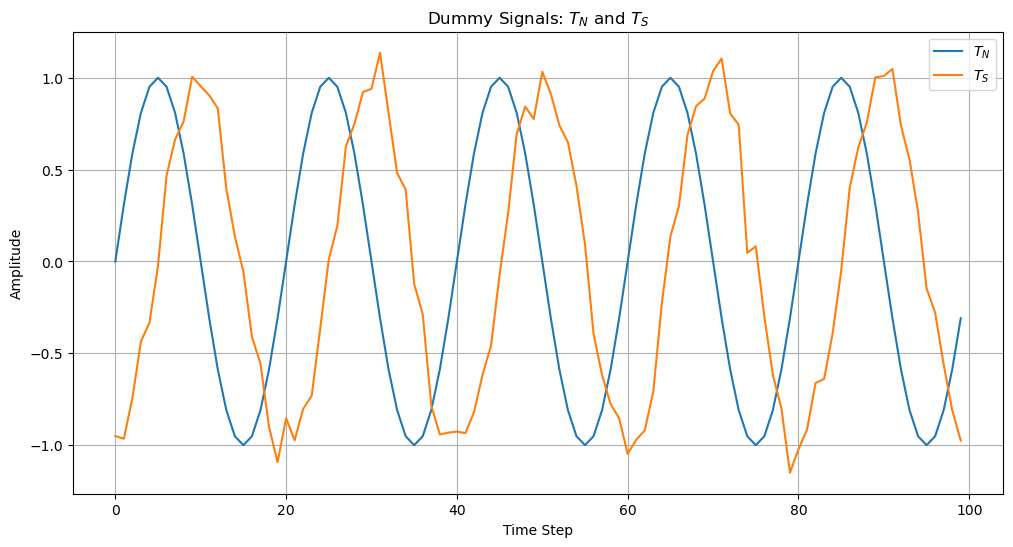

Maximum correlation occurs at lag 5 with a value of 0.937


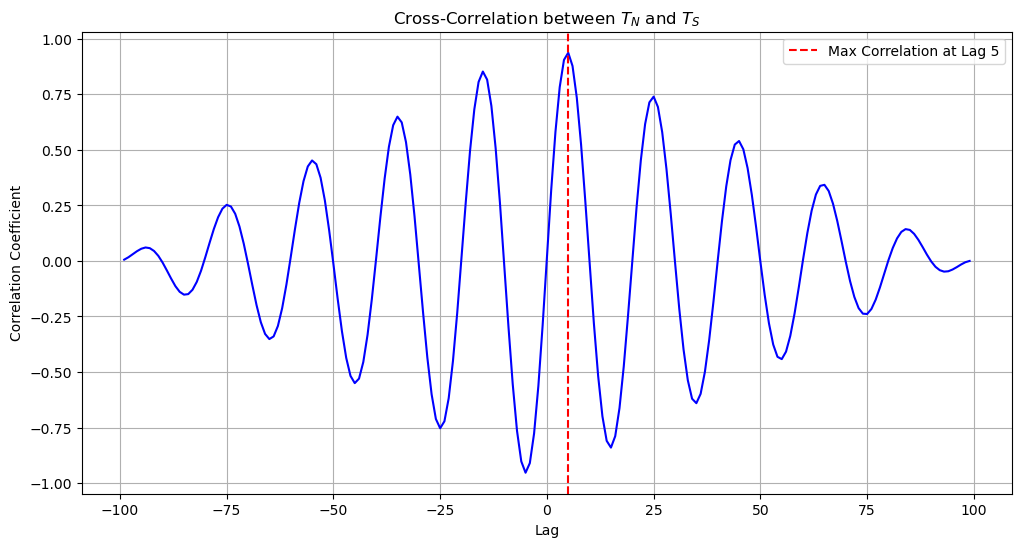

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Set a seed for reproducibility
np.random.seed(42)

# Step 1: Generate Dummy Signals
time_steps = 100
t = np.arange(time_steps)
TN = np.sin(2 * np.pi * t / 20)  # TN is a sine wave

true_lag = 5  # TS lags behind TN by 5 time steps
noise_level = 0.1

TS = np.roll(TN, true_lag) + np.random.normal(0, noise_level, time_steps)

# Plot the Dummy Signals
plt.figure(figsize=(12, 6))
plt.plot(t, TN, label='$T_N$')
plt.plot(t, TS, label='$T_S$')
plt.title('Dummy Signals: $T_N$ and $T_S$')
plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Calculate the Lagged Correlation
TN_centered = TN - np.mean(TN)
TS_centered = TS - np.mean(TS)

correlation = correlate(TS_centered, TN_centered, mode='full')
lags = np.arange(-time_steps + 1, time_steps)
correlation_normalized = correlation / (np.std(TS) * np.std(TN) * time_steps)

# Step 3: Identify the Lag with Maximum Correlation
max_corr_index = np.argmax(correlation_normalized)
optimal_lag = lags[max_corr_index]
max_corr_value = correlation_normalized[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Step 4: Plot the Correlation Strength with Lag
plt.figure(figsize=(12, 6))
plt.plot(lags, correlation_normalized, color='blue')
plt.title('Cross-Correlation between $T_N$ and $T_S$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {optimal_lag}')
plt.legend()
plt.show()


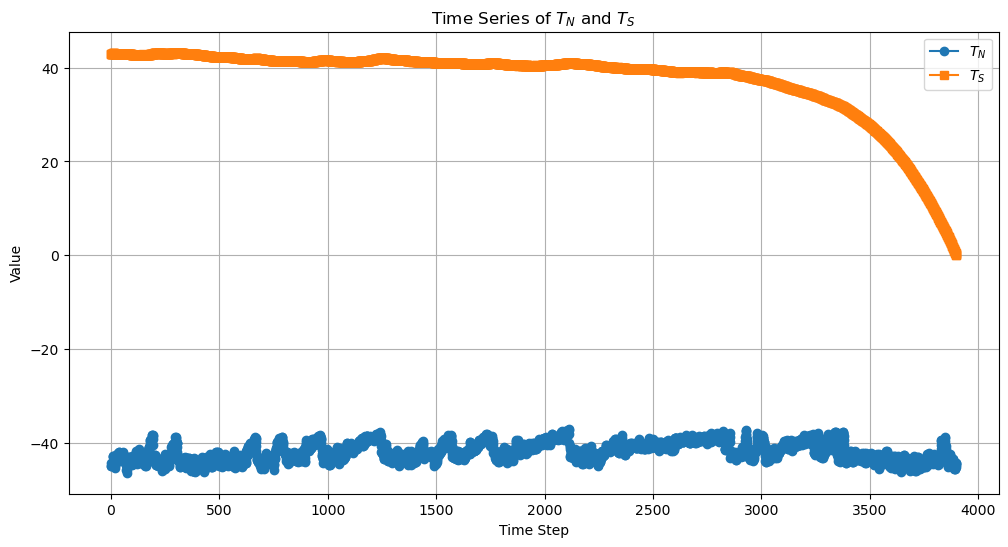

Maximum correlation occurs at lag 3276 with a value of 0.304


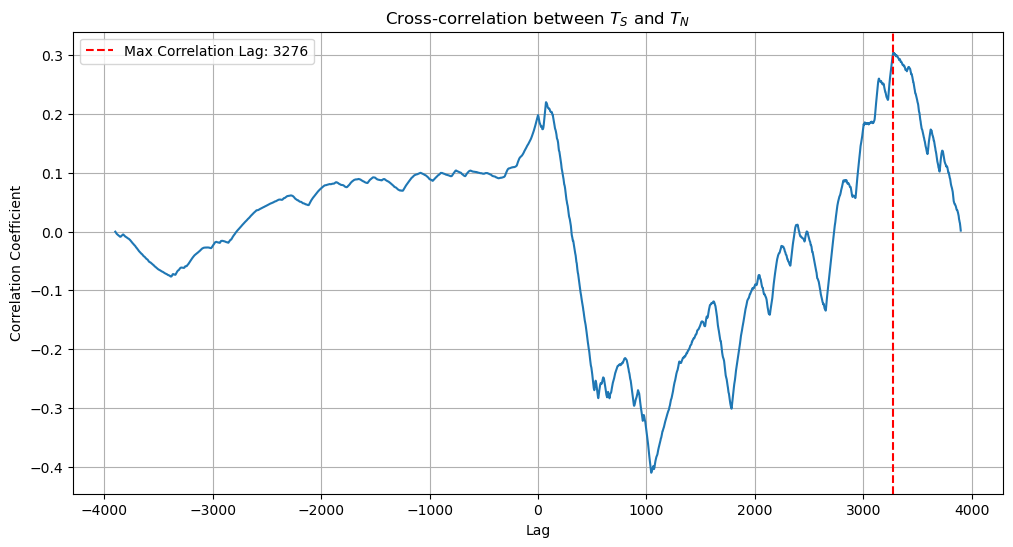

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd


# read the realdata.csv

TN = pd.read_csv("realdata.csv")
# get the second column of TN
TN = TN.iloc[:, 1].values





# Parameters for the model
tau = 400  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS = np.zeros(len(TN))


TS[0] = TS_initial


for i in range(len(TN)-2,-1,-1):

    TS[i] = TS[i+1] + (1/tau) * (-TN[i+1]-TS[i+1])+np.random.normal(0, 0.01)


# Task 1: Plot TN and TS
plt.figure(figsize=(12, 6))
plt.plot(TN, label='$T_N$', marker='o')
plt.plot(TS, label='$T_S$', marker='s')
plt.title('Time Series of $T_N$ and $T_S$')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Calculate the lagged correlation and find the lag between TN and TS
# Compute the cross-correlation
lags = np.arange(-len(TN)+1, len(TN))
corr = correlate(TS - np.mean(TS), TN - np.mean(TN), mode='full') / (np.std(TS) * np.std(TN) * len(TN))

# Find the lag where the correlation is maximum
max_corr_index = np.argmax(corr)
optimal_lag = lags[max_corr_index]
max_corr_value = corr[max_corr_index]

print(f'Maximum correlation occurs at lag {optimal_lag} with a value of {max_corr_value:.3f}')

# Task 3: Plot correlation vs. lag
plt.figure(figsize=(12, 6))
plt.plot(lags, corr)
plt.title('Cross-correlation between $T_S$ and $T_N$')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label=f'Max Correlation Lag: {optimal_lag}')
plt.legend()
plt.show()


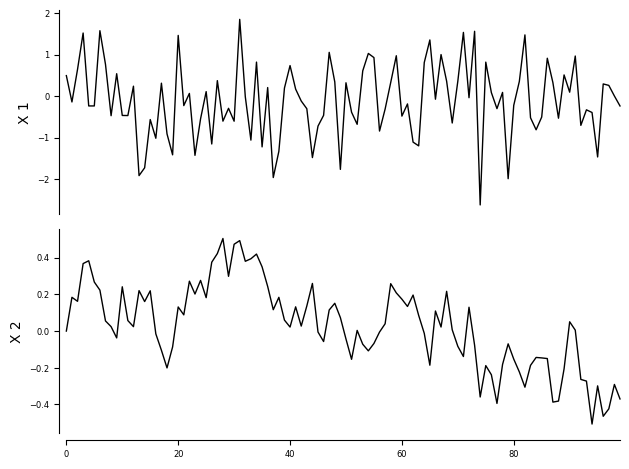

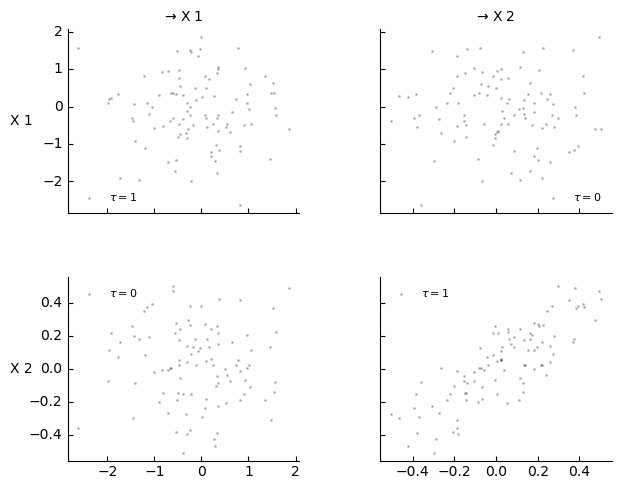


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


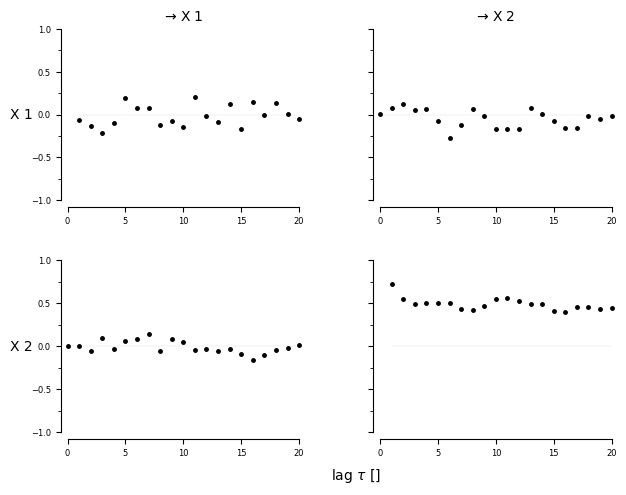

In [5]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI




var_names = [r'X 1', r'X 2']
data = np.array([TN, TS1]).T
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 30
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 10 link(s):
    [pc_alpha = 0.5]
        (X 1 -18): max_pval = 0.10058, |min_val| =  0.267
        (X 1 -11): max_pval = 0.20100, |min_val| =  0.231
        (X 1 -5): max_pval = 0.18280, |min_val| =  0.221
        (X 2 -23): max_pval = 0.20595, |min_val| =  0.219
        (X 2 -7): max_pval = 0.20620, |min_val| =  0.204
        (X 2 -16): max_pval = 0.29937, |min_val| =  0.168
        (X 1 -1): max_pval = 0.40645, |min_val| =  0.139
        (X 1 -14): max_pval = 0.45687, |min_val| =  0.121
        (X 1 -17): max_pval = 0.47643, |min_val| =  0.116
        (X 2 -27): max_pval = 0.49978, |min_val| =  0.110

    Variable X 2 has 9 link(s):
    [pc_alpha = 0.4]
        (X 2 -23): max_pval = 0.02911, |min_val| =  0.3

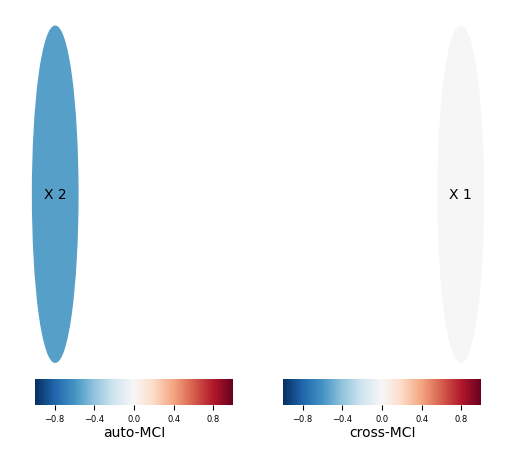

In [6]:

pcmci.verbosity = 1
tau_min=1
tau_max=30
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()